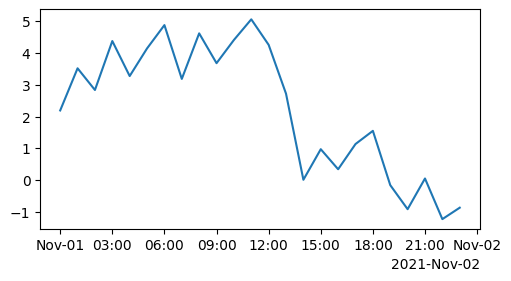

In [33]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

dates = np.arange(np.datetime64('2021-11-01'), # 2021-11-01 00:00:00
                  np.datetime64('2021-11-02'), # 2021-11-01 23:00:00
                  np.timedelta64(1, 'h'))

fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')

data = np.cumsum(np.random.randn(len(dates)))
ax.plot(dates, data)
ax.set_yscale('linear') # log
cdf = mpl.dates.ConciseDateFormatter(ax.xaxis.get_major_locator())
ax.xaxis.set_major_formatter(cdf)

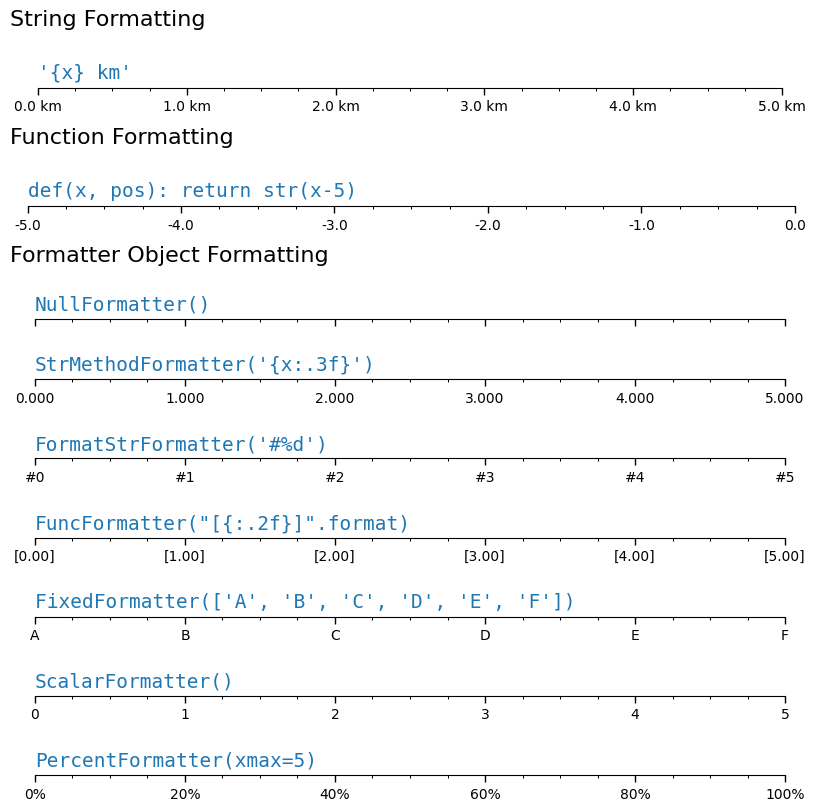

In [1]:
import matplotlib.pyplot as plt

from matplotlib import ticker


def setup(ax, title):
    """Set up common parameters for the Axes in the example."""
    # only show the bottom spine
    ax.yaxis.set_major_locator(ticker.NullLocator())
    ax.spines[['left', 'right', 'top']].set_visible(False)

    # define tick positions
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1.00))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))

    ax.xaxis.set_ticks_position('bottom')
    ax.tick_params(which='major', width=1.00, length=5)
    ax.tick_params(which='minor', width=0.75, length=2.5, labelsize=10)
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 1)
    ax.text(0.0, 0.2, title, transform=ax.transAxes,
            fontsize=14, fontname='Monospace', color='tab:blue')


fig = plt.figure(figsize=(8, 8), layout='constrained')
fig0, fig1, fig2 = fig.subfigures(3, height_ratios=[1.5, 1.5, 7.5])

fig0.suptitle('String Formatting', fontsize=16, x=0, ha='left')
ax0 = fig0.subplots()

setup(ax0, title="'{x} km'")
ax0.xaxis.set_major_formatter('{x} km')


fig1.suptitle('Function Formatting', fontsize=16, x=0, ha='left')
ax1 = fig1.subplots()

setup(ax1, title="def(x, pos): return str(x-5)")
ax1.xaxis.set_major_formatter(lambda x, pos: str(x-5))


fig2.suptitle('Formatter Object Formatting', fontsize=16, x=0, ha='left')
axs2 = fig2.subplots(7, 1)

setup(axs2[0], title="NullFormatter()")
axs2[0].xaxis.set_major_formatter(ticker.NullFormatter())

setup(axs2[1], title="StrMethodFormatter('{x:.3f}')")
axs2[1].xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.3f}"))

setup(axs2[2], title="FormatStrFormatter('#%d')")
axs2[2].xaxis.set_major_formatter(ticker.FormatStrFormatter("#%d"))


def fmt_two_digits(x, pos):
    return f'[{x:.2f}]'


setup(axs2[3], title='FuncFormatter("[{:.2f}]".format)')
axs2[3].xaxis.set_major_formatter(ticker.FuncFormatter(fmt_two_digits))

setup(axs2[4], title="FixedFormatter(['A', 'B', 'C', 'D', 'E', 'F'])")
# FixedFormatter should only be used together with FixedLocator.
# Otherwise, one cannot be sure where the labels will end up.
positions = [0, 1, 2, 3, 4, 5]
labels = ['A', 'B', 'C', 'D', 'E', 'F']
axs2[4].xaxis.set_major_locator(ticker.FixedLocator(positions))
axs2[4].xaxis.set_major_formatter(ticker.FixedFormatter(labels))

setup(axs2[5], title="ScalarFormatter()")
axs2[5].xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))

setup(axs2[6], title="PercentFormatter(xmax=5)")
axs2[6].xaxis.set_major_formatter(ticker.PercentFormatter(xmax=5))

plt.show()